# 3. Profiling

> *Profiling o perfilaje es el conjunto de tecicas que nos permiten entender el comportamiento de un programa.*

## 3.3 Profiling en tiempo

### 3.3.1 Resultados de nuestra intuición

In [2]:
%%capture A1_profile
%run profiling/A1.py

In [3]:
%%capture A2_profile
%run profiling/A2.py

In [4]:
%%capture A3_profile
%run profiling/A3.py

In [5]:
%matplotlib inline

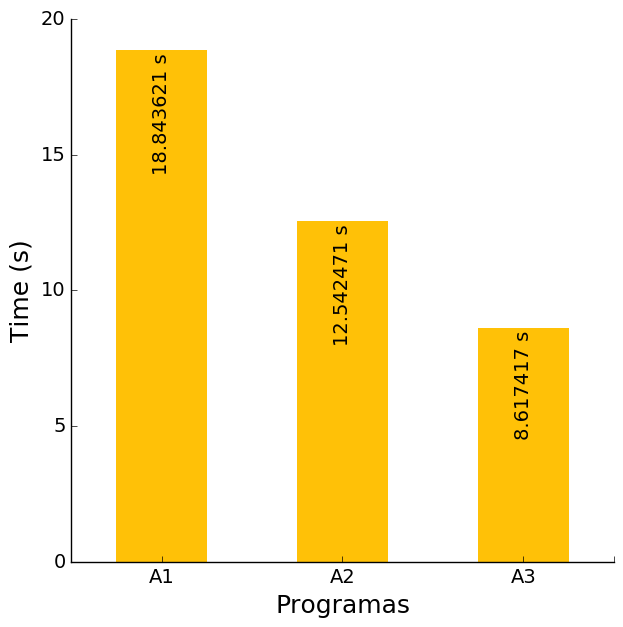

In [6]:
import matplotlib.pyplot as plt
import re


def get_time(profile):
    time = re.sub(r'\rCompletado.*%\n', '', profile.stdout)
    time = time.strip('\n')
    time = time.split('\n')[-1]
    time = time.split(':')[-3:]
    time = [float(t) * (60 ** (2 - i)) for i, t in enumerate(time)]
    time = sum(time)
    return time


A1_time = get_time(A1_profile)
A2_time = get_time(A2_profile)
A3_time = get_time(A3_profile)

times = [A1_time, A2_time, A3_time]
position = [1.25, 2.25, 3.25]
width = 0.5

xticks = [1.5, 2.5, 3.5, 4]
xlabels = ('A1', 'A2', 'A3')

xlabel = 'Programas'
ylabel = 'Time (s)'

plt.figure(figsize=(7, 7), frameon=False)
bars = plt.bar(position, times, width, color='#ffc107', linewidth=0)

for bar in bars:
    height = bar.get_height()
    plt.gcf().gca().text(
        bar.get_x() + bar.get_width() / 2.,
        height - 0.1,
        '{0:.6f} s'.format(height),
        ha='center',
        va='top',
        rotation=90,
        fontsize=14
    )

plt.gcf().gca().set_xticks(xticks)
plt.gcf().gca().set_xticklabels(xlabels, fontsize=14)
plt.gcf().gca().set_xlabel(xlabel, fontsize=18)

plt.gcf().gca().set_yticklabels([int(yt) for yt in plt.gcf().gca().get_yticks()], fontsize=14)
plt.gcf().gca().set_ylabel(ylabel, fontsize=18)

plt.gcf().gca().spines['top'].set_visible(False)
plt.gcf().gca().spines['right'].set_visible(False)
plt.gcf().gca().get_xaxis().tick_bottom()
plt.gcf().gca().get_yaxis().tick_left()
plt.show()

### 3.3.2 Profiling con `!time`

In [ ]:
%%capture B1_profile
!time python profiling/B1.py

In [ ]:
%%capture B2_profile
!time python profiling/B2.py

In [ ]:
%%capture B3_profile
!time python profiling/B3.py

In [ ]:
import matplotlib.pyplot as plt
import re


def normalize_log(profile):
    log = profile.stdout.replace('\r\n', '\n')
    log = log.replace('\n\n', '\n')
    log = log.strip('\n')
    log = log.split('\n')[2:]
    log[0] = [float(t) * (60**(2 - i)) for i, t in enumerate(log[0].split(':')[1:])]
    log[0] = [int((log[0][0] + log[0][1]) / 60.0), log[0][2]]
    log[0] = [str(i) for i in log[0]]
    log[0] = 'loop\t' + 'm'.join(log[0]) + 's'
    log = '\n'.join(log)
    return log


def get_times(log):
    times = log.split('\n')
    times = [time.split('\t') for time in times]
    times = [[key, time.strip('s').split('m')] for key, time in times]
    times = [[key, int(time[0]) * 60 + float(time[1])] for key, time in times]
    times = dict(times)
    return times


B1_log = normalize_log(B1_profile)
B1_times = get_times(B1_log)

B2_log = normalize_log(B2_profile)
B2_times = get_times(B2_log)

B3_log = normalize_log(B3_profile)
B3_times = get_times(B3_log)

colors = ['#ffc107', '#8bc34a', '#00bcd4', '#673ab7']
keys = ['real', 'user', 'loop', 'sys']
times = [B1_times, B2_times, B3_times]
times = dict((key, [time[key] for time in times]) for key in keys)

width = 0.2

xticks = [0.5, 1.5, 2.5, 3.5]
xlabels = ('B1', 'B2', 'B3')

xlabel = 'Programas'
ylabel = 'Time (s)'

plt.figure(figsize=(7, 7), frameon=False)

for i, (key, color) in enumerate(zip(keys, colors)):
    position = [p + i * width + 0.03 for p in [0.1, 1.1, 2.2]]

    bars = plt.bar(position, times[key], width-0.06, color=color, linewidth=0, label=key.capitalize())

    va = 'top' if key != 'sys' else 'bottom'
    offset = -0.2 if key != 'sys' else 0.2

    for bar in bars:
        height = bar.get_height()
        plt.gcf().gca().text(
            bar.get_x() + bar.get_width() / 2. + 0.015,
            height + offset,
            '{0:.6f} s'.format(height),
            ha='center',
            va=va,
            rotation=90,
            fontsize=14
        )

plt.gcf().gca().set_xticks(xticks)
plt.gcf().gca().set_xticklabels(xlabels, fontsize=14)
plt.gcf().gca().set_xlabel(xlabel, fontsize=16)

plt.gcf().gca().set_yticklabels([int(yt) for yt in plt.gcf().gca().get_yticks()], fontsize=14)
plt.gcf().gca().set_ylabel(ylabel, fontsize=16)

plt.gcf().gca().spines['top'].set_visible(False)
plt.gcf().gca().spines['right'].set_visible(False)
plt.gcf().gca().get_xaxis().tick_bottom()
plt.gcf().gca().get_yaxis().tick_left()

plt.gcf().gca().legend()

plt.show()

### 3.3.3 Los módulos profile y pstats

In [7]:
!python -m cProfile -o profiling/C1.profile -s time profiling/C1.py

0:00:36.746846


In [8]:
!python -m cProfile -o profiling/C2.profile -s time profiling/C2.py

0:00:23.650461


In [9]:
!python -m cProfile -o profiling/C3.profile -s time profiling/C3.py

0:00:16.176709


In [10]:
import pstats

C1_stats = pstats.Stats('profiling/C1.profile')
C1_stats.strip_dirs().sort_stats('nfl').print_stats();

C2_stats = pstats.Stats('profiling/C2.profile')
C2_stats.strip_dirs().sort_stats('nfl').print_stats();

C3_stats = pstats.Stats('profiling/C3.profile')
C3_stats.strip_dirs().sort_stats('nfl').print_stats();

Tue Aug  2 16:47:16 2016    profiling/C1.profile

         17249336 function calls (17249325 primitive calls) in 36.775 seconds

   Ordered by: name/file/line

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       19    0.000    0.000    0.000    0.000 {built-in method __new__ of type object at 0x7f2f7ddea360}
        1    0.000    0.000    0.000    0.000 {built-in method _imp._fix_co_filename}
        9    0.000    0.000    0.000    0.000 {built-in method _imp.acquire_lock}
        2    0.001    0.000    0.001    0.000 {built-in method _imp.create_dynamic}
        2    0.000    0.000    0.000    0.000 {built-in method _imp.exec_dynamic}
        3    0.000    0.000    0.000    0.000 {built-in method _imp.is_builtin}
        3    0.000    0.000    0.000    0.000 {built-in method _imp.is_frozen}
       12    0.000    0.000    0.000    0.000 {built-in method _imp.release_lock}
        6    0.000    0.000    0.000    0.000 {built-in method _thread.allocate_lock}
  

### 3.3.2 Profiling con `!time`